# Real Estate Market Analysis

## Data Preprocessing

In [351]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [352]:
customers = pd.read_csv(r'data/customers.csv')
customers

,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,157,C0170,Individual,Emmy,Singh,12/3/1979,F,USA,Virginia,Investment,3,Yes,Agency
158,158,C0138,Individual,Colin,Campos,4/14/1942,M,USA,California,Home,3,No,Website
159,159,C0113,Individual,Anya,Stephenson,6/11/1959,F,USA,California,Home,4,No,Website
160,160,C0147,Individual,Parker,Poole,11/10/1951,M,USA,California,Home,5,No,Website


In [353]:
properties = pd.read_csv(r'data/properties.csv')
properties

,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014
...,...,...,...,...,...,...,...,...,...,...
262,262,5044,5,#NUM!,Apartment,44,1238.58,"$322,610.74",-,NaN
263,263,5047,5,#NUM!,Apartment,47,794.52,"$279,191.26",-,NaN
264,264,5048,5,#NUM!,Apartment,48,1013.27,"$287,996.53",-,NaN
265,265,5050,5,#NUM!,Apartment,50,1074.71,"$365,868.78",-,NaN


In [354]:
customers.columns

Index(['Unnamed: 0', '﻿customerid', 'entity', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'],
      dtype='object')

In [355]:
properties.columns

Index(['Unnamed: 0', '﻿id', 'building', 'date_sale', 'type', 'property#',
       'area', 'price', 'status', 'customerid'],
      dtype='object')

In [356]:
# Renaming the customerid column as it has an issue in excel
customers = customers.rename(columns = {customers.columns[1]: 'customerid'})
properties = properties.rename(columns = {properties.columns[9]: 'customerid'})
customers['customerid'] = customers['customerid'].astype(str)
properties['customerid'] = properties['customerid'].astype(str)

In [357]:
customers.dtypes

Unnamed: 0            int64
customerid           object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [358]:
properties.dtypes

Unnamed: 0      int64
﻿id             int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

In [359]:
# Remove extra spaces to allow merging both data frames
customers['customerid'] = customers['customerid'].str.strip()
properties['customerid'] = properties['customerid'].str.strip()

In [360]:
# we have to do a 'right' join to keep unsold apartments data
merged_data = pd.merge(customers, properties, on = 'customerid', how = 'right')
merged_data

,Unnamed: 0_x,customerid,entity,name,surname,birth_date,sex,country,state,purpose,...,source,Unnamed: 0_y,﻿id,building,date_sale,type,property#,area,price,status
0,140.0,C0028,Individual,Madalyn,Mercer,6/21/1986,F,USA,California,Home,...,Website,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold
1,152.0,C0027,Individual,Lara,Carrillo,2/24/1983,F,USA,California,Home,...,Website,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold
2,70.0,C0112,Individual,Donavan,Flowers,12/27/1985,M,USA,California,Home,...,Client,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold
3,95.0,C0160,Individual,Darien,Dorsey,12/27/1985,M,USA,California,Investment,...,Website,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold
4,86.0,C0014,Individual,Alessandra,Perry,5/15/1979,F,USA,California,Home,...,Agency,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,262,5044,5,#NUM!,Apartment,44,1238.58,"$322,610.74",-
263,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,263,5047,5,#NUM!,Apartment,47,794.52,"$279,191.26",-
264,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,264,5048,5,#NUM!,Apartment,48,1013.27,"$287,996.53",-
265,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,265,5050,5,#NUM!,Apartment,50,1074.71,"$365,868.78",-


In [361]:
# delete both indexing columns
merged_data.drop('Unnamed: 0_x', axis = 1, inplace = True)
merged_data.drop('Unnamed: 0_y', axis = 1, inplace = True)

In [362]:
# No need to handle/remove null values, they just represent the unsold properties
merged_data.isnull().sum()

customerid            0
entity               72
name                 72
surname              72
birth_date           89
sex                  89
country              72
state                86
purpose              72
deal_satisfaction    72
mortgage             72
source               72
﻿id                   0
building              0
date_sale             0
type                  0
property#             0
area                  0
price                 0
status                0
dtype: int64

In [363]:
# These columns have text values for null entries, that's why we handled them differently to show their null entries
merged_data.loc[merged_data['customerid'] == 'nan', 'customerid'] = pd.NA
merged_data.loc[merged_data['status'] == '-', 'status'] = pd.NA

In [364]:
merged_data.isnull().sum()

customerid           72
entity               72
name                 72
surname              72
birth_date           89
sex                  89
country              72
state                86
purpose              72
deal_satisfaction    72
mortgage             72
source               72
﻿id                   0
building              0
date_sale             0
type                  0
property#             0
area                  0
price                 0
status               72
dtype: int64

In [365]:
# converting date columns to the correct data type & handling missing values in that column
merged_data['date_sale'] = pd.to_datetime(merged_data['date_sale'], errors = 'coerce')
merged_data['birth_date'] = pd.to_datetime(merged_data['birth_date'], errors = 'coerce')

In [366]:
# Handle the variable type of deal_satisfaction column & handling missing values
merged_data['deal_satisfaction'] = merged_data['deal_satisfaction'].astype(float)
merged_data.loc[merged_data['deal_satisfaction'].isnull(), 'deal_satisfaction'] = pd.NA

In [367]:
# fixing the price column and changing it's data type to float
merged_data['price'] = merged_data['price'].str.replace(r'[$,]', '', regex = True).astype(float)

In [368]:
merged_data['country'].unique()

array(['USA', 'UK', 'USA ', 'Belgium', 'Russia', 'Denmark', 'Germany',
       'Mexico', 'Canada', nan], dtype=object)

In [369]:
#fixing the inconsistency in the 'country' column
merged_data['country'] = merged_data['country'].str.strip()
merged_data['country'].unique()

array(['USA', 'UK', 'Belgium', 'Russia', 'Denmark', 'Germany', 'Mexico',
       'Canada', nan], dtype=object)

In [370]:
# No inconsistencies found in the state column
merged_data['state'].unique()

array(['California', 'Virginia', 'Arizona', 'Oregon', 'Nevada',
       'Colorado', 'Utah', nan, 'Kansas', 'Wyoming'], dtype=object)

In [371]:
# Converting the mortgage column from categorical to numeric
merged_data.loc[merged_data['mortgage'] == 'Yes', 'mortgage'] = 1
merged_data.loc[merged_data['mortgage'] == 'No', 'mortgage'] = 0

In [372]:
# combining name + surname = Full name
merged_data['full_name'] = merged_data['name'] + ' ' + merged_data['surname']
merged_data.drop('name', axis = 1, inplace = True)
merged_data.drop('surname', axis = 1, inplace = True)

In [373]:
# creating an age column instead of the birthdate column
current_dt = datetime.datetime.now()
merged_data['age'] = (current_dt - merged_data['birth_date']).dt.days // 365
merged_data.drop('birth_date', axis = 1, inplace = True)

In [374]:
# final dataset
merged_data

,customerid,entity,sex,country,state,purpose,deal_satisfaction,mortgage,source,﻿id,building,date_sale,type,property#,area,price,status,full_name,age
0,C0028,Individual,F,USA,California,Home,5.0,0,Website,1030,1,2005-11-01,Apartment,30,743.09,246172.68,Sold,Madalyn Mercer,39.0
1,C0027,Individual,F,USA,California,Home,5.0,0,Website,1029,1,2005-10-01,Apartment,29,756.21,246331.90,Sold,Lara Carrillo,42.0
2,C0112,Individual,M,USA,California,Home,1.0,1,Client,2002,2,2007-07-01,Apartment,2,587.28,209280.91,Sold,Donavan Flowers,39.0
3,C0160,Individual,M,USA,California,Investment,3.0,1,Website,2031,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold,Darien Dorsey,39.0
4,C0014,Individual,F,USA,California,Home,4.0,0,Agency,1049,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold,Alessandra Perry,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5044,5,NaT,Apartment,44,1238.58,322610.74,<NA>,NaN,NaN
263,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5047,5,NaT,Apartment,47,794.52,279191.26,<NA>,NaN,NaN
264,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5048,5,NaT,Apartment,48,1013.27,287996.53,<NA>,NaN,NaN
265,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5050,5,NaT,Apartment,50,1074.71,365868.78,<NA>,NaN,NaN


## Descriptive Statistics

In [376]:
merged_data.describe()

,deal_satisfaction,﻿id,building,date_sale,property#,area,price,age
count,195.000000,267.000000,267.000000,195,267.000000,267.000000,267.000000,178.000000
mean,3.600000,2975.142322,2.947566,2006-11-08 14:38:46.153846272,27.580524,936.221311,281171.901386,64.247191
min,1.000000,1002.000000,1.000000,2004-03-01 00:00:00,1.000000,410.710000,117564.070000,39.000000
25%,3.000000,2015.500000,2.000000,2006-04-16 00:00:00,14.500000,756.210000,217553.055000,55.000000
50%,4.000000,3024.000000,3.000000,2007-03-01 00:00:00,28.000000,798.280000,249075.660000,63.000000
75%,5.000000,4031.500000,4.000000,2007-09-01 00:00:00,40.000000,1121.950000,326964.855000,73.750000
max,5.000000,5052.000000,5.000000,2010-05-01 00:00:00,59.000000,1942.500000,538271.740000,94.000000
std,1.340872,1392.197474,1.391794,NaN,15.361437,284.894858,89119.121005,12.980891


In [377]:
# number of each building type in our data
merged_data['building'].value_counts()

building
3    63
2    57
1    52
5    52
4    43
Name: count, dtype: int64

In [378]:
# number of sold properties per property type
merged_data.groupby(['building', 'status'])['status'].count()

building  status
1         Sold      46
2         Sold      54
3         Sold      53
4         Sold      23
5         Sold      19
Name: status, dtype: int64

In [379]:
# number of sold properties per building type & mortgage option
merged_data.groupby(['building', 'mortgage'])['status'].count()

building  mortgage
1         0           32
          1           14
2         0           36
          1           18
3         0           38
          1           15
4         0           14
          1            9
5         0           13
          1            6
Name: status, dtype: int64

In [380]:
# number of sold properities by building type & source of the sale
merged_data.groupby(['building', 'source'])['status'].count()

building  source 
1         Agency      8
          Website    38
2         Agency     24
          Client      7
          Website    23
3         Agency     19
          Client      8
          Website    26
4         Agency      4
          Client      1
          Website    18
5         Agency      4
          Client      1
          Website    14
Name: status, dtype: int64

In [381]:
# number of sold properties by building type & purpose of purchase
merged_data.groupby(['building', 'purpose'])['status'].count()

building  purpose   
1         Home          27
          Investment    19
2         Home          34
          Investment    20
3         Home          29
          Investment    24
4         Home          20
          Investment     3
5         Home           9
          Investment    10
Name: status, dtype: int64

In [382]:
# number of sold properties by building type & owner's orientation
merged_data.groupby(['building', 'sex'])['sex'].count()

building  sex
1         F      13
          M      18
2         F      20
          M      32
3         F      17
          M      36
4         F      13
          M      10
5         F       7
          M      12
Name: sex, dtype: int64

In [383]:
# number of sold properties by building type & type of property
merged_data.groupby(['building', 'type'])['type'].count()

building  type     
1         Apartment    44
          Office        8
2         Apartment    57
3         Apartment    63
4         Apartment    43
5         Apartment    52
Name: type, dtype: int64

In [384]:
# number of sold properties by building type & buying entity
merged_data.groupby(['building', 'entity'])['entity'].count()

building  entity    
1         Company       15
          Individual    31
2         Company        2
          Individual    52
3         Individual    53
4         Individual    23
5         Individual    19
Name: entity, dtype: int64

In [385]:
# statistics of building type vs ( deal_satisfaction, area, price, age, mortgage)
merged_data.groupby(['building'])[['deal_satisfaction', 'area', 'price', 'age', 'mortgage']].agg(['count', 'mean', 'median']).transpose()

building                            1              2              3  \
deal_satisfaction count            46             54             53   
                  mean       3.630435       3.518519       3.566038   
                  median          5.0            4.0            4.0   
area              count            52             57             63   
                  mean     928.038846      943.89193     927.852381   
                  median       782.25         785.48         781.07   
price             count            52             57             63   
                  mean    275143.2425  286661.848246  280451.255556   
                  median   241983.225      250773.15      252185.99   
age               count            31             52             53   
                  mean      64.096774      61.980769      66.415094   
                  median         62.0           60.0           65.0   
mortgage          count            46             54             53   
                  mean       0.304348       0.333333       0.283019   
                  median          0.0            0.0            0.0   

building                              4              5  
deal_satisfaction count              23             19  
                  mean         3.869565       3.526316  
                  median            4.0            4.0  
area              count              43             52  
                  mean        974.72093     914.298654  
                  median         794.52          798.5  
price             count              43             52  
                  mean    290239.515581  274557.604615  
                  median      244820.67      262433.08  
age               count              23             19  
                  mean        62.782609      66.421053  
                  median           61.0           66.0  
mortgage          count              23             19  
                  mean         0.391304       0.315789  
                  median            0.0            0.0

In [386]:
# number of sold properites per country
merged_data.groupby(['country'])['status'].count()

country
Belgium      2
Canada       7
Denmark      1
Germany      1
Mexico       1
Russia       4
UK           2
USA        177
Name: status, dtype: int64

In [387]:
# number of sold properties by country & sale source
merged_data.groupby(['country', 'source'])['status'].count()

country  source 
Belgium  Agency       1
         Website      1
Canada   Website      7
Denmark  Agency       1
Germany  Agency       1
Mexico   Agency       1
Russia   Agency       3
         Website      1
UK       Agency       2
USA      Agency      50
         Client      17
         Website    110
Name: status, dtype: int64

In [388]:
# number of sold properties by country & owner's orientation
merged_data.groupby(['country', 'sex'])['sex'].count()

country  sex
Belgium  F       1
         M       1
Canada   M       7
Denmark  F       1
Germany  M       1
Mexico   M       1
Russia   F       3
         M       1
UK       M       2
USA      F      65
         M      95
Name: sex, dtype: int64

In [389]:
# number of sold properties by country & buying entity
merged_data.groupby(['country', 'entity'])['entity'].count()

country  entity    
Belgium  Individual      2
Canada   Individual      7
Denmark  Individual      1
Germany  Individual      1
Mexico   Individual      1
Russia   Individual      4
UK       Individual      2
USA      Company        17
         Individual    160
Name: entity, dtype: int64

In [390]:
# number of sold properties by country & purchase purpose
merged_data.groupby(['country', 'purpose'])['purpose'].count()

country  purpose   
Belgium  Home            1
         Investment      1
Canada   Investment      7
Denmark  Investment      1
Germany  Investment      1
Mexico   Home            1
Russia   Home            2
         Investment      2
UK       Investment      2
USA      Home          115
         Investment     62
Name: purpose, dtype: int64

In [391]:
# number of sold properties by country & building type
merged_data.groupby(['country', 'type'])['type'].count()

country  type     
Belgium  Apartment      2
Canada   Apartment      7
Denmark  Apartment      1
Germany  Apartment      1
Mexico   Apartment      1
Russia   Apartment      4
UK       Apartment      2
USA      Apartment    170
         Office         7
Name: type, dtype: int64

In [392]:
# statistics for country vs ( deal_satisfaction, area, price, age, mortgage )
merged_data.groupby(['country'])[['deal_satisfaction', 'area', 'price', 'age', 'mortgage']].agg(['count', 'mean', 'median']).transpose()

country                     Belgium         Canada    Denmark    Germany  \
deal_satisfaction count           2              7          1          1   
                  mean          3.0            5.0        1.0        5.0   
                  median        3.0            5.0        1.0        5.0   
area              count           2              7          1          1   
                  mean       852.73     917.382857     785.48     743.41   
                  median     852.73         785.48     785.48     743.41   
price             count           2              7          1          1   
                  mean    229075.47  274069.384286  257183.48  205098.21   
                  median  229075.47      236608.95  257183.48  205098.21   
age               count           2              7          1          1   
                  mean         63.0           78.0       60.0       59.0   
                  median       63.0           78.0       60.0       59.0   
mortgage          count           2              7          1          1   
                  mean          0.0            0.0        0.0        0.0   
                  median        0.0            0.0        0.0        0.0   

country                      Mexico      Russia         UK            USA  
deal_satisfaction count           1           4          2            177  
                  mean          3.0         2.5        4.0       3.581921  
                  median        3.0         3.0        4.0            4.0  
area              count           1           4          2            177  
                  mean      1283.45    903.7575     739.48     900.794463  
                  median    1283.45     927.455     739.48         794.52  
price             count           1           4          2            177  
                  mean    338181.18  278828.835  220142.68  270096.266554  
                  median  338181.18   275653.94  220142.68      243052.59  
age               count           1           4          2            160  
                  mean         60.0        74.0       55.5        63.6125  
                  median       60.0        72.5       55.5           62.0  
mortgage          count           1           4          2            177  
                  mean          0.0        0.25        0.0       0.344633  
                  median        0.0         0.0        0.0            0.0

In [393]:
# number of sold properties by state
merged_data.groupby(['state'])['status'].value_counts()

state       status
Arizona     Sold       11
California  Sold      120
Colorado    Sold       11
Kansas      Sold        1
Nevada      Sold       17
Oregon      Sold       11
Utah        Sold        5
Virginia    Sold        4
Wyoming     Sold        1
Name: count, dtype: int64

In [394]:
# cumilative sum of sold properties by state
merged_data.groupby(['state'])['status'].value_counts().cumsum()

state       status
Arizona     Sold       11
California  Sold      131
Colorado    Sold      142
Kansas      Sold      143
Nevada      Sold      160
Oregon      Sold      171
Utah        Sold      176
Virginia    Sold      180
Wyoming     Sold      181
Name: count, dtype: int64

## Data Analysis

In [396]:
# adding age groups
bins = [0, 19, 25, 31, 36, 42, 48, 54, 59, 65, 71, 100]
merged_data['age_intervals'] = pd.cut(merged_data['age'], bins = bins)
merged_data['age_intervals']

0      (36.0, 42.0]
1      (36.0, 42.0]
2      (36.0, 42.0]
3      (36.0, 42.0]
4      (42.0, 48.0]
           ...     
262             NaN
263             NaN
264             NaN
265             NaN
266             NaN
Name: age_intervals, Length: 267, dtype: category
Categories (11, interval[int64, right]): [(0, 19] < (19, 25] < (25, 31] < (31, 36] ... (54, 59] < (59, 65] < (65, 71] < (71, 100]]

In [397]:
# number of sold properties by age group
merged_data.groupby('age_intervals')['status'].count()

E:\ALL\Temp\Temp\ipykernel_17920\3103445114.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data.groupby('age_intervals')['status'].count()


age_intervals
(0, 19]       0
(19, 25]      0
(25, 31]      0
(31, 36]      0
(36, 42]      4
(42, 48]     15
(48, 54]     25
(54, 59]     27
(59, 65]     30
(65, 71]     23
(71, 100]    54
Name: status, dtype: int64

In [398]:
# adding pricing groups
merged_data['price_intervals'] = pd.cut(merged_data['price'], 10)
# number of AVAILABLE properties per price group
merged_data['price_intervals'].value_counts()

price_intervals
(201705.604, 243776.371]    88
(243776.371, 285847.138]    47
(159634.837, 201705.604]    32
(285847.138, 327917.905]    31
(369988.672, 412059.439]    21
(327917.905, 369988.672]    18
(454130.206, 496200.973]    11
(496200.973, 538271.74]      9
(412059.439, 454130.206]     7
(117143.362, 159634.837]     3
Name: count, dtype: int64

In [399]:
# number of SOLD properties per pricing group
merged_data.groupby('price_intervals')['status'].count()

E:\ALL\Temp\Temp\ipykernel_17920\3393099886.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data.groupby('price_intervals')['status'].count()


price_intervals
(117143.362, 159634.837]     2
(159634.837, 201705.604]    28
(201705.604, 243776.371]    68
(243776.371, 285847.138]    34
(285847.138, 327917.905]    24
(327917.905, 369988.672]    12
(369988.672, 412059.439]    13
(412059.439, 454130.206]     4
(454130.206, 496200.973]     7
(496200.973, 538271.74]      3
Name: status, dtype: int64

In [400]:
# correlation between age group and number vs sold properties
merged_data['age_intervals'].value_counts().corr(merged_data.groupby('age_intervals')['status'].count())

E:\ALL\Temp\Temp\ipykernel_17920\3867008081.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data['age_intervals'].value_counts().corr(merged_data.groupby('age_intervals')['status'].count())


0.9999999999999998

In [401]:
# correlation between price group vs sold properties
merged_data['price_intervals'].value_counts().corr(merged_data.groupby('price_intervals')['status'].count())

E:\ALL\Temp\Temp\ipykernel_17920\1857995991.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_data['price_intervals'].value_counts().corr(merged_data.groupby('price_intervals')['status'].count())


0.9954006138665011

## Data Visualization

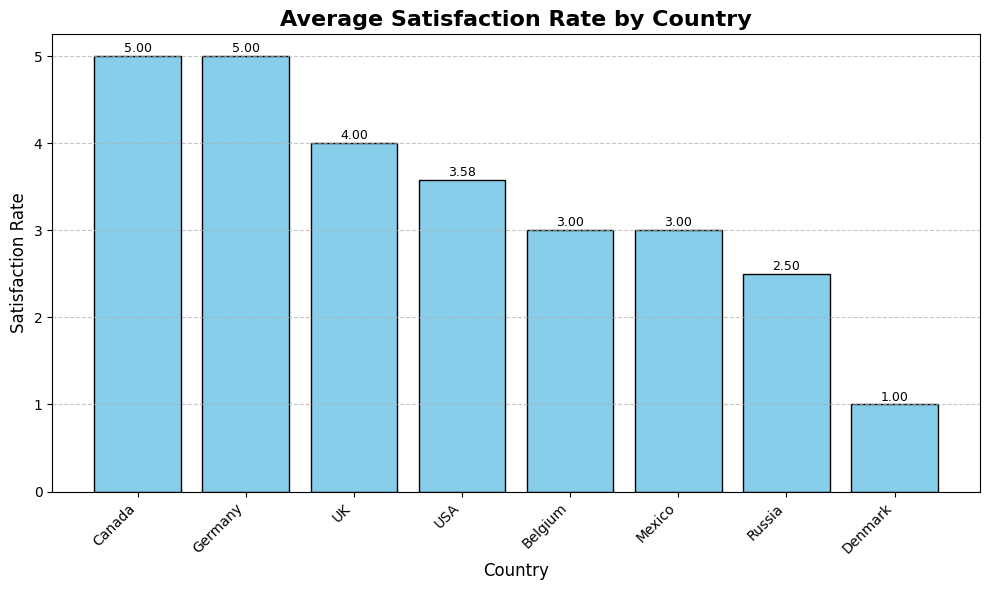

In [403]:
# Compute average satisfaction rate per country
avg_satisfaction_rate_per_country = (
    merged_data.groupby('country')['deal_satisfaction'].mean().sort_values(ascending=False)
)

# Set figure size
plt.figure(figsize=(10, 6))

# Create bar plot with custom colors
bars = plt.bar(avg_satisfaction_rate_per_country.index,
               avg_satisfaction_rate_per_country.values,
               color='skyblue', edgecolor='black')

# Add title & labels with better font sizes
plt.title("Average Satisfaction Rate by Country", fontsize=16, fontweight='bold')
plt.ylabel("Satisfaction Rate", fontsize=12)
plt.xlabel("Country", fontsize=12)

# Rotate x labels for readability
plt.xticks(rotation=45, ha='right')

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f"{height:.2f}", ha='center', va='bottom', fontsize=9)

# Tight layout for spacing
plt.tight_layout()

plt.show()

E:\ALL\Temp\Temp\ipykernel_17920\665710288.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  monthly_avg = merged_data.resample('Q', on='date_sale')['price'].sum()


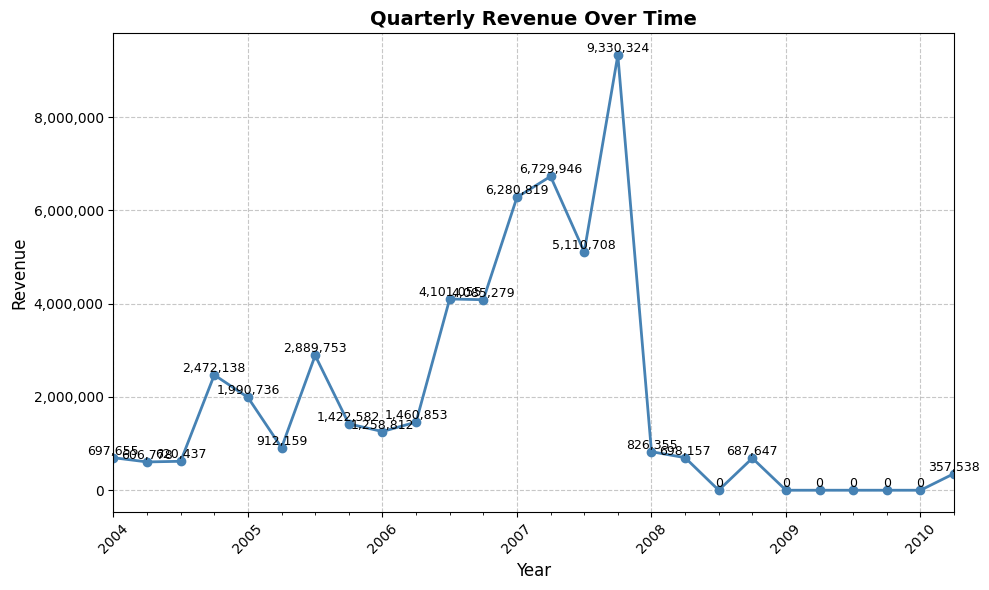

In [404]:


# Quarterly revenue over time
monthly_avg = merged_data.resample('Q', on='date_sale')['price'].sum()

plt.figure(figsize=(10, 6))
ax = monthly_avg.plot(kind='line', marker='o', linewidth=2, color='steelblue')

plt.title("Quarterly Revenue Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Revenue", fontsize=12)

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Add value labels for each point
for x, y in zip(monthly_avg.index, monthly_avg.values):
    plt.text(x, y, f"{int(y):,}", ha='center', va='bottom', fontsize=9, rotation=0)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pareto chart showing apartments sold by state

E:\ALL\Temp\Temp\ipykernel_17920\1930315774.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(grouped['state'], rotation=45, ha='right')


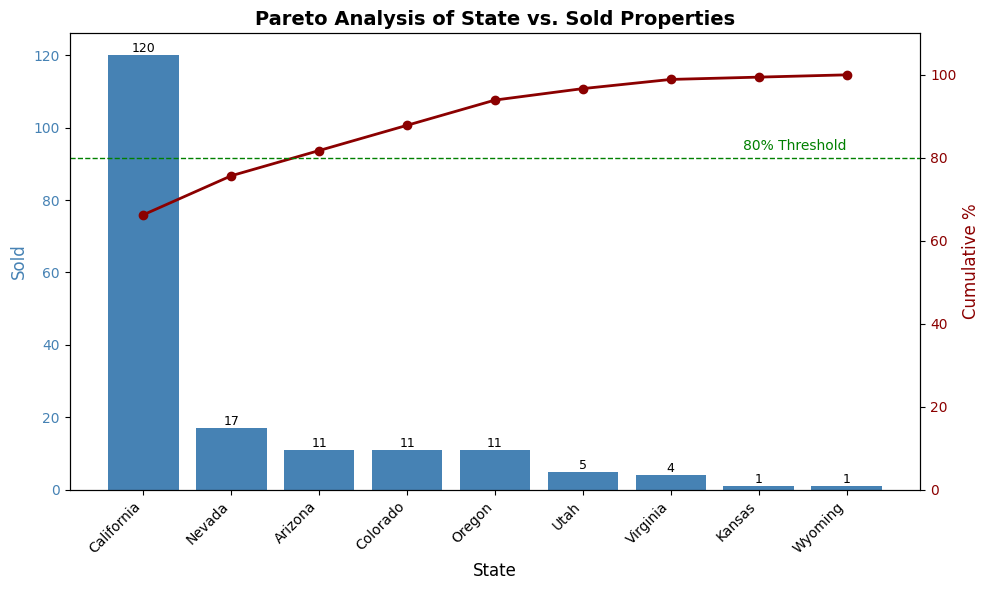

In [406]:
# Group the data
grouped = merged_data.groupby(['state', 'status'])['status'].count().reset_index(name='count')

# Sort data
grouped = grouped.sort_values(by='count', ascending=False)

# Add cumulative %
grouped['cumperc'] = grouped['count'].cumsum() / grouped['count'].sum() * 100

# Create Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for counts
bars = ax1.bar(grouped['state'], grouped['count'], color='steelblue')
ax1.set_xlabel("State", fontsize=12)
ax1.set_ylabel("Sold", fontsize=12, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticklabels(grouped['state'], rotation=45, ha='right')

# Add count labels above bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f"{height:,}", 
             ha='center', va='bottom', fontsize=9)

# Line chart for cumulative %
ax2 = ax1.twinx()
ax2.plot(grouped['state'], grouped['cumperc'], color='darkred', marker='o', linewidth=2)
ax2.set_ylabel("Cumulative %", fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')
ax2.set_ylim(0, 110)

# Add 80% threshold line
ax2.axhline(80, color='green', linestyle='--', linewidth=1)
ax2.text(len(grouped)-1, 82, "80% Threshold", color='green', fontsize=10, ha='right')

# Title
plt.title("Pareto Analysis of State vs. Sold Properties", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Age Distribution Histogram

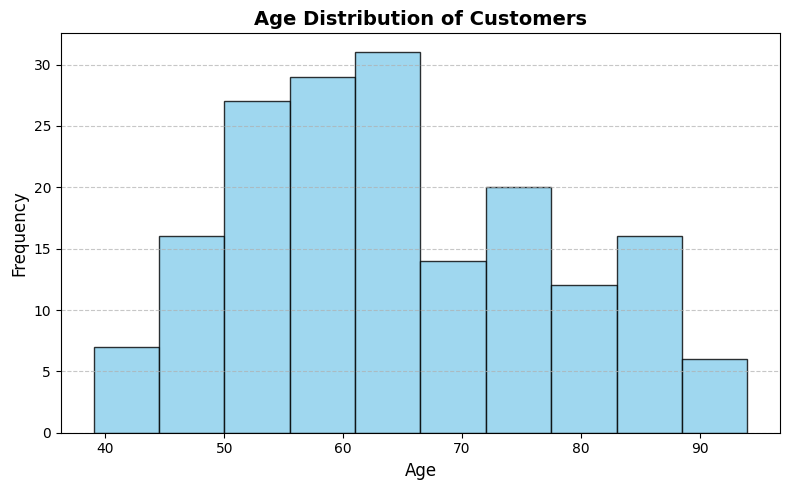

In [408]:
# Create the Histogram
plt.figure(figsize=(8, 5))
plt.hist(merged_data['age'], bins=10, color='skyblue', edgecolor='black', alpha=0.8)

# Add labels and titles
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Age Distribution of Customers", fontsize=14, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Stacked bar chart showing time series of different building types revenue

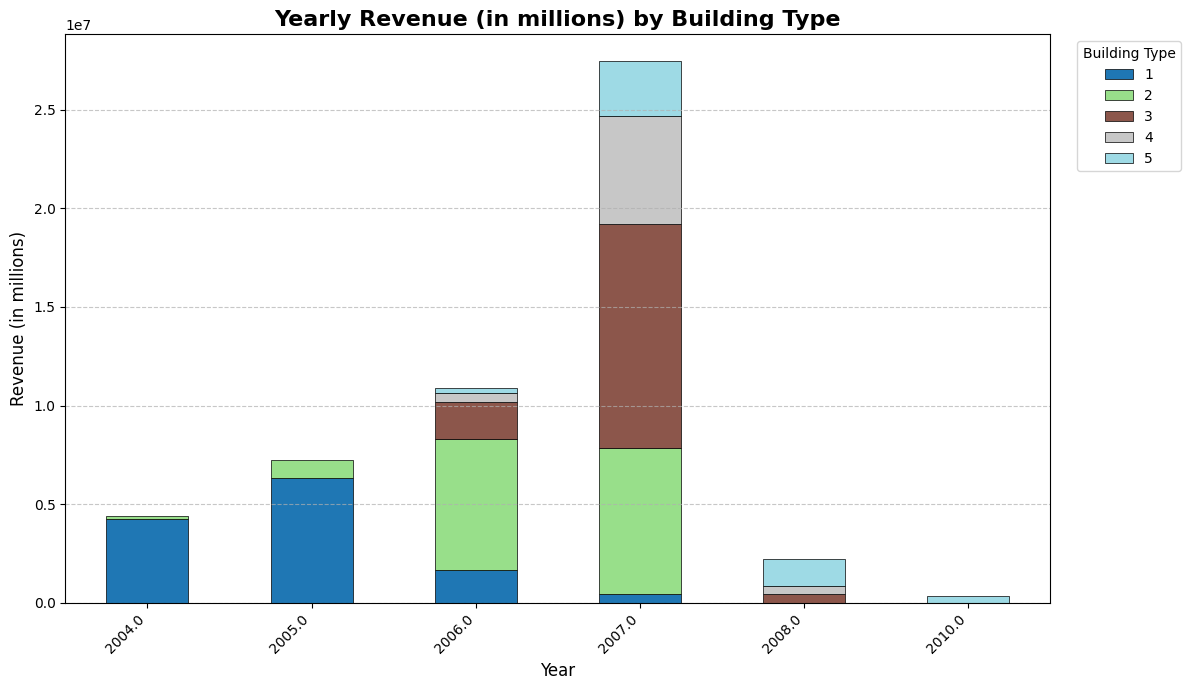

In [410]:
# Getting the data
yearly_revenue = merged_data
yearly_revenue['date_sale'] = yearly_revenue['date_sale'].dt.year

yearly_revenue = yearly_revenue.groupby(['date_sale', 'building'])['price'].sum().unstack(fill_value=0)

# Plotting the stacked bar chart
ax = yearly_revenue.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='tab20',  # cleaner, professional color palette
    edgecolor='black',  # makes bars clearer
    linewidth=0.5
)

# Titles and labels
plt.title("Yearly Revenue (in millions) by Building Type", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Revenue (in millions)", fontsize=12)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right')

# Add legend outside the chart
plt.legend(title="Building Type", bbox_to_anchor=(1.02, 1), loc='upper left')

# Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
